# Age of M/M/1, M/D/1 and D/M/1 queue

In this tutorial we are going to take a close look at $M/M/1$, $M/D/1$ and $D/M/1$ queues. They are all single server queues. 

In example of $M/M/1$ we have exponentially distributed inter-arrival times and exponentially distributed serving times. We know that exponential disitribution is determined with one parameter, usually denoted with $\lambda$. Suppose that inter-arrival times are distiributed $Exp(\lambda)$ and serving times $Exp(\mu)$. $\mu$ and $\lambda$ are tipically not the same. We actually want $\mu$ to be bigger than $\lambda$ or equivalentely on average servings must be shorter than the time elapsed between two arrivals. Otherwise we call system unstable. Furhermore, we call $\lambda$ rate of arrivals and $\mu$ serving rate. 

In example of $M/D/1$ we have exponentially $Exp(\lambda)$ distributed inter-arrival times and deterministic time $T$ of serving. Rate of arrivals is thus $\lambda$ and serving rate $\frac{1}{T}$. Note that in example of serving rate, we have $\frac{1}{E(T)}$ since $E(T) = T$. Generally, if we have random variable $G$ for inter-arrival times (serving times), arrival rate (serving rate) is $\frac{1}{E(G)}$. It makes sense in example of exponential distribution, since if $X$ ~ $Exp(\lambda)$ than $\frac{1}{E(x)} =
\frac{1}{\frac{1}{\lambda}} = \lambda$. 

*Note: Sometimes we use the terms update rate and update time instead of serving rate and serving time.* 

On the other hand by $D/M/1$ we have deterministic inter-arrival time and exponentially distributed serving time. 

As we will see in tutorial, on average, $D/M/1$ has the lowest age. So, for fixed $\lambda$ (arrival rate) and $\mu$ (serving rate), we will see, $D/M/1$ always has the lowest age. Differences may vary as we change either of the paramethers but $D/M/1$ always has the lowest age, second is $M/D/1$ and the worst $M/M/1$. We may notice that deterministic is better than random if it has the same expected value. We will argue this results in the tutorial.

## Difference between simulation and analytical deriviation

When conducting research in probability theory or statistics, we often adopt one of two possible strategies. We either try it out numerous times to ensure there are no surprises, or we use mathematical analysis. The first approach is typically not too challenging to execute, but it requires numerous repetitions to deduce anything useful with a reasonable level of certainty. The more complex the simulation, the more time it takes. This was especially a problem before the era of computers. Nowadays, computers can simulate many repetitions in a reasonable amount of time.

On the other side of this empirical approach stands mathematical analysis. In this approach, we are dealing with complete certainty, and results are exact. However, the downside of this approach is that it is rarely easy to use, and most of the time, it is very challenging. Moreover, there are problems that, in fact, can't be solved analytically. In this tutorial, we are going to harness the power of modern computers to solve problems empirically. 

To demonstrate the idea of empirical and analytical way of thinking consider calculating the expected value of exponential distribution with rate $\lambda$. Empirical approach would be to simualte exponential distiribution 1000 times and calcualte the average result. Notice that the number we would get is not an exact expected value of an exponential distribution but only its estimate. On the other hand to solve this problem analitically we would integrate the density distribution function $f(x)$ of exponential distribution multiplied with $x$. That would yield an exact result. 

## Simulation in Python using Numpy

Firstly, we will learn ourselves how to use a piece of Python's library Numpy (especially sublibrary Random) to simulate processes that we are dealing with in this tutorial. We first import Numpy, Random and Matplotlib.

In [2]:
#libraries for visualisation, array representation and random simulations
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd

Next we are going to simulate Poisson process with rate of arrivals $\lambda$. Here is the definition of Poisson process: 

***Definition**: Poisson process (also homogeneous Poisson process) HPP($\lambda$) is such stochastic process in which inter-arrival times are independently exponentailly Exp($\lambda$) distributed.*

Now we will simulate 10 arrivals of HPP($\lambda$) and plot then on the line plot.

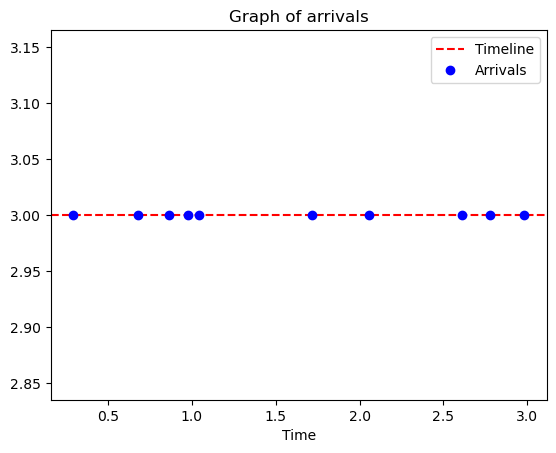

In [3]:
list_of_arrivals = []
#We calculate 10 arrival_times of Poisson process with rate 2.
t = random.exponential(scale=(1/2))
list_of_arrivals.append(t)
for i in range(9):
    t = list_of_arrivals[-1] + random.exponential(scale=(1/2))
    list_of_arrivals.append(t)

horizontal_line_value = 3  

# Create new graph
plt.figure()

# Draw horizontal line
plt.axhline(y=horizontal_line_value, color='r', linestyle='--', label='Timeline')

# Draw points on the horisontal line for given numbers
plt.plot(list_of_arrivals, [horizontal_line_value] * len(list_of_arrivals), 'bo', label='Arrivals')

# Title of graph
plt.xlabel('Time')
plt.title('Graph of arrivals')

plt.legend()

plt.show()


As we have simulated this, we might become more confident and wish to simulate something more intricate. Our next step is to simulate the age of an $M/M/1$ queue with an inter-arrival rate of 2 and a service rate of 3.

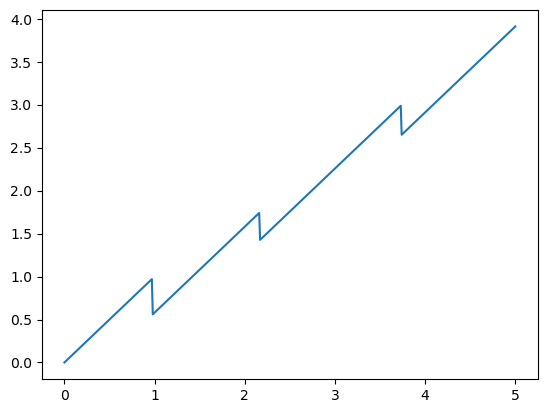

In [8]:
# We first create list of arrival times
list_of_arrivals = []
t = random.exponential(scale=(1/2)) #first arrival
list_of_arrivals.append(t)
# and all of the remaining arrivals
for i in range(20):
    t = list_of_arrivals[-1] + random.exponential(scale=(1/2))
    list_of_arrivals.append(t)
    
# We create list of serving times
list_of_servings = []
t = random.exponential(scale=(1/3)) #duration of the first serving
list_of_servings.append(t)
# and all of the other servings
for i in range(20):
    t = list_of_servings[-1] + random.exponential(scale=(1/3))
    list_of_servings.append(t)
    
# Now the crucial part
ar_ind = 0 #index of next arrival
up_ind = 0 #index of next update
inter_update_time = 0 #time elapsed after last update
time = 0 #current time
queue = [] 
age = 0  #current age
# We are going to save current age at every time step in age_list
age_list = [0]  

#We are going to make 500 time steps of 0.01 and create age_list of ages
for i in range(500):
    time += 0.01
    inter_update_time += 0.01
    age += 0.01
    if inter_update_time > list_of_servings[up_ind] and len(queue) != 0:
        age = time - queue[0]
        queue = queue[1:]
        inter_update_time = 0
        up_ind += 1
    if time > list_of_arrivals[ar_ind]:
        queue.append(list_of_arrivals[ar_ind])
        ar_ind += 1
    age_list.append(age)

# We now create list of x vaules for the graph    
x_list = [0]
x = 0
for i in range(500):
    x += 0.01
    x_list.append(x)
    
# plt only takes numpy arrays, so we must transform lists into arrays.
x_values = np.array(x_list)
age_values = np.array(age_list)

plt.plot(x_values, age_values)

plt.show()


We observe the typical sawtooth shape in the graph. The age increases linearly between two service instances and decreases when we commence serving a new customer. Let's generalize the previous example and encapsulate the simulation within a function that relies on the observation time, the arrival rate, and the service rate.

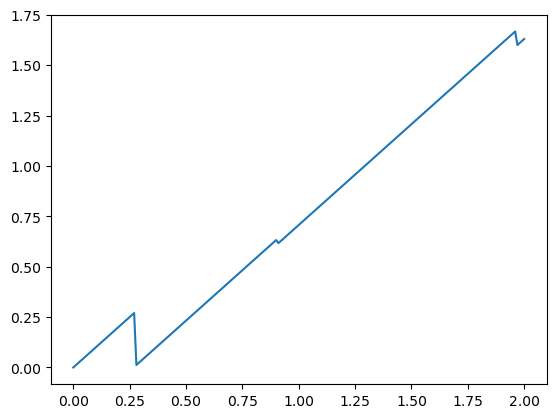

In [8]:
# This function will be a general one that takes the total simulation time, service rate, and arrival rate as 
# input and returns the x-coordinates and the corresponding y-coordinates for the plot.
def generate_age(total_time: int, sr: float, ar: float, time_step=0.01):
    """This function is a general one that takes the total simulation time, 
    service rate, and arrival rate as input and returns the x-coordinates 
    and the corresponding y-coordinates for the plot.
    
    Parameters
    ----------
    total_time: int
        Total time of the simulation.
    sr: float
    ar: float
    time_step: float
        Default value of this parameter is 0.1
        
    Returns
    -------
    list
       Nested list with two sublists, first is x-coordinates, second y-values.
    """
    # We first create list of arrival times
    list_of_arrivals = []
    t = random.exponential(scale=(1/ar)) #first arrival
    list_of_arrivals.append(t)
    # all remaining arrivals
    for i in range(total_time*ar*2):
        t = list_of_arrivals[-1] + random.exponential(scale=(1/ar))
        list_of_arrivals.append(t)
        
    # We create list of serving times
    list_of_servings = []
    t = random.exponential(scale=(1/sr)) #first serving time
    list_of_servings.append(t)
    # all of the remaining serving times
    for i in range(total_time*ar*2):
        t = list_of_servings[-1] + random.exponential(scale=(1/sr))
        list_of_servings.append(t)
        
    # Now the crucial part
    ar_ind = 0 #index of next arrival
    up_ind = 0 #index of next update
    inter_update_time = 0 #time elapsed after last update
    time = 0 #current time
    queue = [] 
    age = 0  #current age
    age_list = [0] # Here, we are going to save current age at every time step in age_list  
    
    #We are going to make total_time/time_step time steps and save age at each step
    for i in range(int(total_time/time_step)):
        time += time_step
        inter_update_time += time_step
        age += time_step
        if inter_update_time > list_of_servings[up_ind]:
            if len(queue) != 0:
                age = time - queue[0]
                queue = queue[1:]
                inter_update_time = 0
                up_ind += 1
        if time > list_of_arrivals[ar_ind]:
            queue.append(list_of_arrivals[ar_ind])
            ar_ind += 1
        age_list.append(age)
    
    # We now create list of x vaules for the graph    
    x_list = [0]
    x = 0
    for i in range(int(total_time/time_step)):
        x += time_step
        x_list.append(x)
    return [x_list, age_list]

# Let's plot an concrete example.
sez = generate_age(2,5,2)
x_values = np.array(sez[0])
age_values = np.array(sez[1])

plt.plot(x_values, age_values)

## Comparison of ages of M/M/1, M/D/1 and D/M/1 queue

In this section we are going to simulate average ages of $M/M/1$, $M/D/1$ and $D/M/1$ queues and plot them in the same graph, to see the difference. 
We define the average age $\Delta$ with
$$ \Delta = \lim_{\tau \to \infty} \Delta_{\tau},$$
where 
$$ \Delta_{\tau} = \frac{1}{\tau} \int_{0}^{\tau} \Delta(t) dt. $$
$\Delta(t)$ in the second formula is age at time $t$. 
We are going to approximate $\Delta$ with average in the long period of time. We further assume that service rate $\mu$ is fixed. Its value is 1. Because we are only interested in stable system we are going to observe differences in average age for arrival rates $\lambda$ between 0 and 1. Let's start with our simulation. 

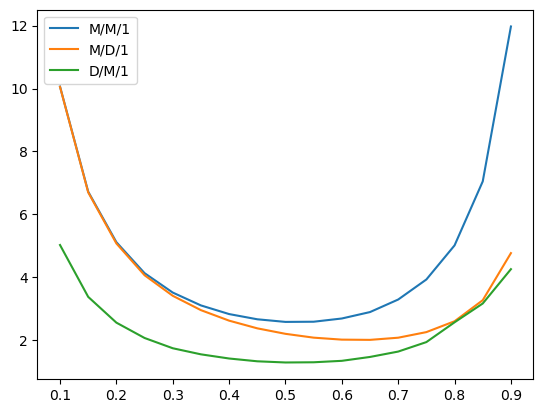

In [3]:
def average_triple(rate_of_arrivals: float, rate_of_servings: float, total_time=4000000, time_step=0.05):
    """returns average age for M/M/1, M/D/1 and D/M/1 queues with specific rate of arrivals and servings.
    
    Parameteres
    -----------
    rate_of_arrivals: float
    rate_of_servings: float
    total_time: int
        Default value is set to 2000000
    time_step: float
        Default value is set to 0.05
        
    Returns
    -------
    list
        nested list with three sublists representing age of M/M/1, M/D/1 and D/M/1 respectevely.
    """
    # We first create list of arrivals according to exponential distribution with rate rate_of_arrivals
    list_of_arrivals = []
    t = random.exponential(scale=(1/rate_of_arrivals)) #first arrival
    list_of_arrivals.append(t)
    # all of the remaining arrivals
    for i in range(8000000):
        t = list_of_arrivals[-1] + random.exponential(scale=(1/rate_of_arrivals))
        list_of_arrivals.append(t)
    # We than create list of serving times according to exponential distribution with rate rate_of_servings
    list_of_servings = random.exponential(scale=(1/rate_of_servings),size=8000000)
    
    # As we have that we might simulate age for M/M/1, M/D/1 and D/M/1 queue
    #First: age of M/M/1 queue. 
    time = 0
    age = 0
    up_ind = 0 #index of the next update time 
    ar_ind = 0 #index of the next arrival time
    inter_update_time = 0 #time elapsed since the last update
    queue = []
    ageMM1_list = [] #we are going to save values of current age in this list
    for i in range(int(total_time/time_step)):
        inter_update_time += time_step
        age += time_step
        time += time_step
        if inter_update_time > list_of_servings[up_ind]:
            if queue != []:
                inter_update_time = 0
                age = time - queue[0]
                queue = queue[1:]
                up_ind += 1
        if time > list_of_arrivals[ar_ind]:
            queue.append(list_of_arrivals[ar_ind])
            ar_ind += 1
        ageMM1_list.append(age)
                
    
    #Second: age of M/D/1 queue. 
    time = 0
    age = 0
    up_ind = 0
    ar_ind = 0
    inter_update_time = 0
    queue = []
    ageMD1_list = []
    for i in range(int(total_time/time_step)):
        inter_update_time += time_step
        age += time_step
        time += time_step
        if inter_update_time > (1/rate_of_servings):
            if queue != []:
                inter_update_time = 0
                age = time - queue[0]
                queue = queue[1:]
        if time > list_of_arrivals[ar_ind]:
            queue.append(list_of_arrivals[ar_ind])
            ar_ind += 1
        ageMD1_list.append(age)
        
    #Third: age of D/M/1 queue. 
    time = 0
    age = 0
    up_ind = 0
    ar_ind = 0
    inter_update_time = 0
    inter_arrival_time = 0
    queue = []
    ageDM1_list = []
    for i in range(int(total_time/time_step)):
        inter_update_time += time_step
        inter_arrival_time += time_step
        age += time_step
        time += time_step
        if inter_update_time > list_of_servings[up_ind]:
            if queue != []:
                inter_update_time = 0
                age = time - queue[0]
                queue = queue[1:]
                up_ind += 1
        if inter_arrival_time > 1/(rate_of_arrivals):
            queue.append(time)
            inter_arrival_time = 0
        ageDM1_list.append(age)
    
    # We calcualte average values of ages for our queues.
    age_MM1 = np.average(np.array(ageMM1_list))
    age_MD1 = np.average(np.array(ageMD1_list))
    age_DM1 = np.average(np.array(ageDM1_list))
    
    return [age_MM1, age_MD1, age_DM1]

# We are now going to fix serving rate to 1. We are going to plot average ages of all three queues according to arrival rate that
# we are going to change between 0 and 1.

# We create x_values (81 values between 0.1 and 0.9). 
x_sez = [0.1]
x = 0.1
for i in range(16):
    x += 0.05
    x_sez.append(x)
    
x_values = np.array(x_sez)

#In the next lists we save average ages.
age_sezMM = []
age_sezMD = []
age_sezDM = []
for i in x_sez:
    li = average_triple(i, 1)
    age_sezMM.append(li[0])
    age_sezMD.append(li[1])
    age_sezDM.append(li[2])
    
# We transform lists into  numpy arrays.    
age_valuesMM = np.array(age_sezMM)
age_valuesMD = np.array(age_sezMD)
age_valuesDM = np.array(age_sezDM)

#We plot our results.
plt.plot(x_values, age_valuesMM, label="M/M/1")
plt.plot(x_values, age_valuesMD, label="M/D/1")
plt.plot(x_values, age_valuesDM, label="D/M/1")

plt.legend()

plt.show()

We notice that $M/M/1$ has the biggest average age for all values of $\lambda$. On the other hand $D/M/1$ has the smallest average age for all arguments. But it is also interesting to observe how curves for $M/M/1$ and $M/D/1$ almost connect for small arguments and how $M/D/1$ and $D/M/1$ almost connect for bigger arguments.   
Otherwise, picture says more than tousand words.

## Exercises

1. Calcualte expected value of exponential distribution analitically and empirically using Paython.
2. Simulate age of D/M/1 queue for arrival rate 3, serving rate 5 and total time 2. 